In [1]:
import numpy as np
import pandas as pd
from tortreinador.utils.plot import plot_line_2
from tortreinador.utils.preprocessing import load_data
from tortreinador.train import TorchTrainer
from tortreinador.models.MDN import mdn, Mixture, NLLLoss
from tortreinador.utils.View import init_weights, split_weights
from tortreinador.utils.metrics import r2_score
import torch
import torch.nn as nn
import joblib
from sklearn.preprocessing import MinMaxScaler
import math
import matplotlib
import matplotlib.pyplot as plt
import proplot as pplt

In [2]:
df_GG = pd.read_excel('D:\\Resource\\Gas_Giants_Core_Earth20W.xlsx')
df_GG['M_total (M_E)'] = df_GG['Mcore (M_J/10^3)'] + df_GG['Menv (M_E)']

In [3]:
input_parameters = [
    'Mass (M_J)',
    'Radius (R_E)',
    'T_sur (K)',
]

output_parameters = [
    'M_total (M_E)',
    'T_int (K)',
    'P_CEB (Mbar)',
    'T_CEB (K)'
]

In [4]:
# data_sampled = df_GG.sample(int(10000 / 0.8)).reset_index()

In [5]:
t_loader, v_loader, t_x, t_y, m_x, m_y = load_data(df_GG, input_parameters, output_parameters, batch_size=256)

In [6]:
model = mdn(len(input_parameters), len(output_parameters), 20, 512)
init_weights(model)
criterion = NLLLoss()
pdf = Mixture()
optim = torch.optim.Adam(split_weights(model), lr=0.0001, weight_decay=0.001)

In [7]:
trainer = TorchTrainer(epoch=200)

Batch size: 512, Epoch:200, is GPU: True


In [8]:
# t_l, v_l, val_r2, train_r2, mse = trainer.fit_for_MDN(t_loader, v_loader, criterion, model=model, mixture=pdf, model_save_path='D:\\Resource\\MDN\\GrainExoModel\\TransferLearningCompare\\', optim=optim, best_r2=0.8, warmup_epoch=10)

t_l, v_l, val_r2, train_r2, mse = trainer.fit_for_MDN(t_loader, v_loader, criterion, model=model, mixture=pdf, model_save_path='D:\\Resource\\MDN\\GrainExoModel\\', optim=optim, best_r2=0.8, gamma=0.7, warmup_epoch=10, lr_milestones=[100, 112, 120, 137])



module.root_layer.0.weight : torch.Size([512, 3])
module.root_layer.0.bias : torch.Size([512])
module.root_layer.2.weight : torch.Size([512, 512])
module.root_layer.2.bias : torch.Size([512])
module.root_layer.4.weight : torch.Size([512, 512])
module.root_layer.4.bias : torch.Size([512])
module.pi.0.weight : torch.Size([512, 512])
module.pi.0.bias : torch.Size([512])
module.pi.2.weight : torch.Size([20, 512])
module.pi.2.bias : torch.Size([20])
module.mu.0.weight : torch.Size([512, 512])
module.mu.0.bias : torch.Size([512])
module.mu.2.weight : torch.Size([80, 512])
module.mu.2.bias : torch.Size([80])
module.sigma.0.weight : torch.Size([512, 512])
module.sigma.0.bias : torch.Size([512])
module.sigma.2.weight : torch.Size([80, 512])
module.sigma.2.bias : torch.Size([80])


  0%|          | 0/625 [00:00<?, ?batch/s]E:\anaconda\envs\deeplearning\lib\site-packages\torch\optim\lr_scheduler.py:136: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)
Epoch 16 Validating: 100%|██████████| 79/79 [00:02<00:00, 32.35batch/s, loss=-15.7343, loss_avg=-14.9921, mse=0.0024, r2=0.8380]


Save Best model: R2:0.8380, Loss Avg:-14.9921


Epoch 17 Validating: 100%|██████████| 79/79 [00:02<00:00, 33.64batch/s, loss=-15.4436, loss_avg=-14.7947, mse=0.0081, r2=0.8568]


Save Best model: R2:0.8568, Loss Avg:-14.7947


Epoch 18 Validating: 100%|██████████| 79/79 [00:02<00:00, 34.32batch/s, loss=-15.4411, loss_avg=-15.0514, mse=0.0034, r2=0.8810]


Save Best model: R2:0.8810, Loss Avg:-15.0514


Epoch 19 Validating: 100%|██████████| 79/79 [00:02<00:00, 28.29batch/s, loss=-15.4553, loss_avg=-14.9784, mse=0.0032, r2=0.9039]


Save Best model: R2:0.9039, Loss Avg:-14.9784


Epoch 20 Validating: 100%|██████████| 79/79 [00:02<00:00, 34.93batch/s, loss=-15.8872, loss_avg=-15.5954, mse=0.0038, r2=0.9183]


Save Best model: R2:0.9183, Loss Avg:-15.5954


Epoch 24 Validating: 100%|██████████| 79/79 [00:02<00:00, 33.04batch/s, loss=-14.6185, loss_avg=-14.7315, mse=0.0027, r2=0.9197]


Save Best model: R2:0.9197, Loss Avg:-14.7315


Epoch 25 Validating: 100%|██████████| 79/79 [00:02<00:00, 31.88batch/s, loss=-15.6821, loss_avg=-15.6458, mse=0.0017, r2=0.9348]


Save Best model: R2:0.9348, Loss Avg:-15.6458


Epoch 26 Validating: 100%|██████████| 79/79 [00:02<00:00, 31.33batch/s, loss=-14.6525, loss_avg=-15.3765, mse=0.0015, r2=0.9505]


Save Best model: R2:0.9505, Loss Avg:-15.3765


Epoch 27 Validating: 100%|██████████| 79/79 [00:02<00:00, 33.00batch/s, loss=-16.1051, loss_avg=-15.9026, mse=0.0023, r2=0.9545]


Save Best model: R2:0.9545, Loss Avg:-15.9026


Epoch 30 Validating: 100%|██████████| 79/79 [00:02<00:00, 35.57batch/s, loss=-16.3661, loss_avg=-16.6978, mse=0.0008, r2=0.9586]


Save Best model: R2:0.9586, Loss Avg:-16.6978


Epoch 31 Validating: 100%|██████████| 79/79 [00:02<00:00, 34.99batch/s, loss=-16.1714, loss_avg=-16.8704, mse=0.0012, r2=0.9633]


Save Best model: R2:0.9633, Loss Avg:-16.8704


Epoch 35 Validating: 100%|██████████| 79/79 [00:02<00:00, 33.90batch/s, loss=-16.9929, loss_avg=-17.2797, mse=0.0008, r2=0.9639]


Save Best model: R2:0.9639, Loss Avg:-17.2797


Epoch 40 Validating: 100%|██████████| 79/79 [00:02<00:00, 33.61batch/s, loss=-17.0757, loss_avg=-17.3729, mse=0.0009, r2=0.9662]


Save Best model: R2:0.9662, Loss Avg:-17.3729


Epoch 51 Validating: 100%|██████████| 79/79 [00:02<00:00, 36.09batch/s, loss=-17.4575, loss_avg=-17.7879, mse=0.0005, r2=0.9668]


Save Best model: R2:0.9668, Loss Avg:-17.7879


Epoch 52 Validating: 100%|██████████| 79/79 [00:02<00:00, 33.78batch/s, loss=-17.9964, loss_avg=-18.3323, mse=0.0006, r2=0.9707]


Save Best model: R2:0.9707, Loss Avg:-18.3323


Epoch 54 Validating: 100%|██████████| 79/79 [00:02<00:00, 33.91batch/s, loss=-17.6227, loss_avg=-18.1035, mse=0.0007, r2=0.9709]


Save Best model: R2:0.9709, Loss Avg:-18.1035


Epoch 56 Validating: 100%|██████████| 79/79 [00:02<00:00, 30.18batch/s, loss=-18.6512, loss_avg=-18.6368, mse=0.0006, r2=0.9753]


Save Best model: R2:0.9753, Loss Avg:-18.6368


Epoch 67 Validating: 100%|██████████| 79/79 [00:02<00:00, 33.21batch/s, loss=-18.5512, loss_avg=-18.7027, mse=0.0005, r2=0.9765]


Save Best model: R2:0.9765, Loss Avg:-18.7027


Epoch 69 Validating: 100%|██████████| 79/79 [00:02<00:00, 34.21batch/s, loss=-18.6547, loss_avg=-18.7730, mse=0.0006, r2=0.9772]


Save Best model: R2:0.9772, Loss Avg:-18.7730


Epoch 72 Validating: 100%|██████████| 79/79 [00:02<00:00, 35.54batch/s, loss=-18.8623, loss_avg=-18.9239, mse=0.0004, r2=0.9797]


Save Best model: R2:0.9797, Loss Avg:-18.9239


Epoch 75 Validating: 100%|██████████| 79/79 [00:01<00:00, 41.08batch/s, loss=-18.8146, loss_avg=-18.8981, mse=0.0006, r2=0.9797]


Save Best model: R2:0.9797, Loss Avg:-18.8981


Epoch 81 Validating: 100%|██████████| 79/79 [00:02<00:00, 32.40batch/s, loss=-18.9121, loss_avg=-18.9345, mse=0.0006, r2=0.9801]


Save Best model: R2:0.9801, Loss Avg:-18.9345


Epoch 85 Validating: 100%|██████████| 79/79 [00:01<00:00, 41.63batch/s, loss=-19.1405, loss_avg=-19.2830, mse=0.0006, r2=0.9819] 


Save Best model: R2:0.9819, Loss Avg:-19.2830


Epoch 88 Validating: 100%|██████████| 79/79 [00:02<00:00, 39.06batch/s, loss=-18.9163, loss_avg=-19.1435, mse=0.0005, r2=0.9821]


Save Best model: R2:0.9821, Loss Avg:-19.1435


Epoch 106 Validating: 100%|██████████| 79/79 [00:02<00:00, 33.56batch/s, loss=-19.4252, loss_avg=-19.4283, mse=0.0005, r2=0.9833]


Save Best model: R2:0.9833, Loss Avg:-19.4283


Epoch 107 Validating: 100%|██████████| 79/79 [00:02<00:00, 33.69batch/s, loss=-19.7429, loss_avg=-19.6724, mse=0.0006, r2=0.9839]


Save Best model: R2:0.9839, Loss Avg:-19.6724


Epoch 121 Validating: 100%|██████████| 79/79 [00:02<00:00, 38.32batch/s, loss=-20.0325, loss_avg=-19.9592, mse=0.0005, r2=0.9840]


Save Best model: R2:0.9840, Loss Avg:-19.9592


Epoch 133 Validating: 100%|██████████| 79/79 [00:01<00:00, 40.55batch/s, loss=-20.3354, loss_avg=-20.2887, mse=0.0004, r2=0.9845]


Save Best model: R2:0.9845, Loss Avg:-20.2887


Epoch 136 Validating: 100%|██████████| 79/79 [00:02<00:00, 38.80batch/s, loss=-20.4292, loss_avg=-20.3376, mse=0.0004, r2=0.9847]


Save Best model: R2:0.9847, Loss Avg:-20.3376


Epoch 137 Validating: 100%|██████████| 79/79 [00:02<00:00, 39.17batch/s, loss=-20.3820, loss_avg=-20.2970, mse=0.0004, r2=0.9849]


Save Best model: R2:0.9849, Loss Avg:-20.2970


Epoch 157 Validating: 100%|██████████| 79/79 [00:02<00:00, 35.75batch/s, loss=-20.6830, loss_avg=-20.5142, mse=0.0004, r2=0.9851]


Save Best model: R2:0.9851, Loss Avg:-20.5142


Epoch 181 Validating: 100%|██████████| 79/79 [00:02<00:00, 31.98batch/s, loss=-20.5511, loss_avg=-20.5051, mse=0.0005, r2=0.9851]


Save Best model: R2:0.9851, Loss Avg:-20.5051


Epoch 184 Validating: 100%|██████████| 79/79 [00:02<00:00, 33.00batch/s, loss=-20.6886, loss_avg=-20.5773, mse=0.0004, r2=0.9852]


Save Best model: R2:0.9852, Loss Avg:-20.5773


Epoch 190 Validating: 100%|██████████| 79/79 [00:02<00:00, 31.56batch/s, loss=-20.7229, loss_avg=-20.5313, mse=0.0003, r2=0.9854]


Save Best model: R2:0.9854, Loss Avg:-20.5313


Epoch 199 Validating: 100%|██████████| 79/79 [00:02<00:00, 30.48batch/s, loss=-20.8478, loss_avg=-20.6670, mse=0.0005, r2=0.9854]


Save Best model: R2:0.9854, Loss Avg:-20.6670


Epoch 200 Validating: 100%|██████████| 79/79 [00:02<00:00, 34.28batch/s, loss=-20.6948, loss_avg=-20.5411, mse=0.0005, r2=0.9818]


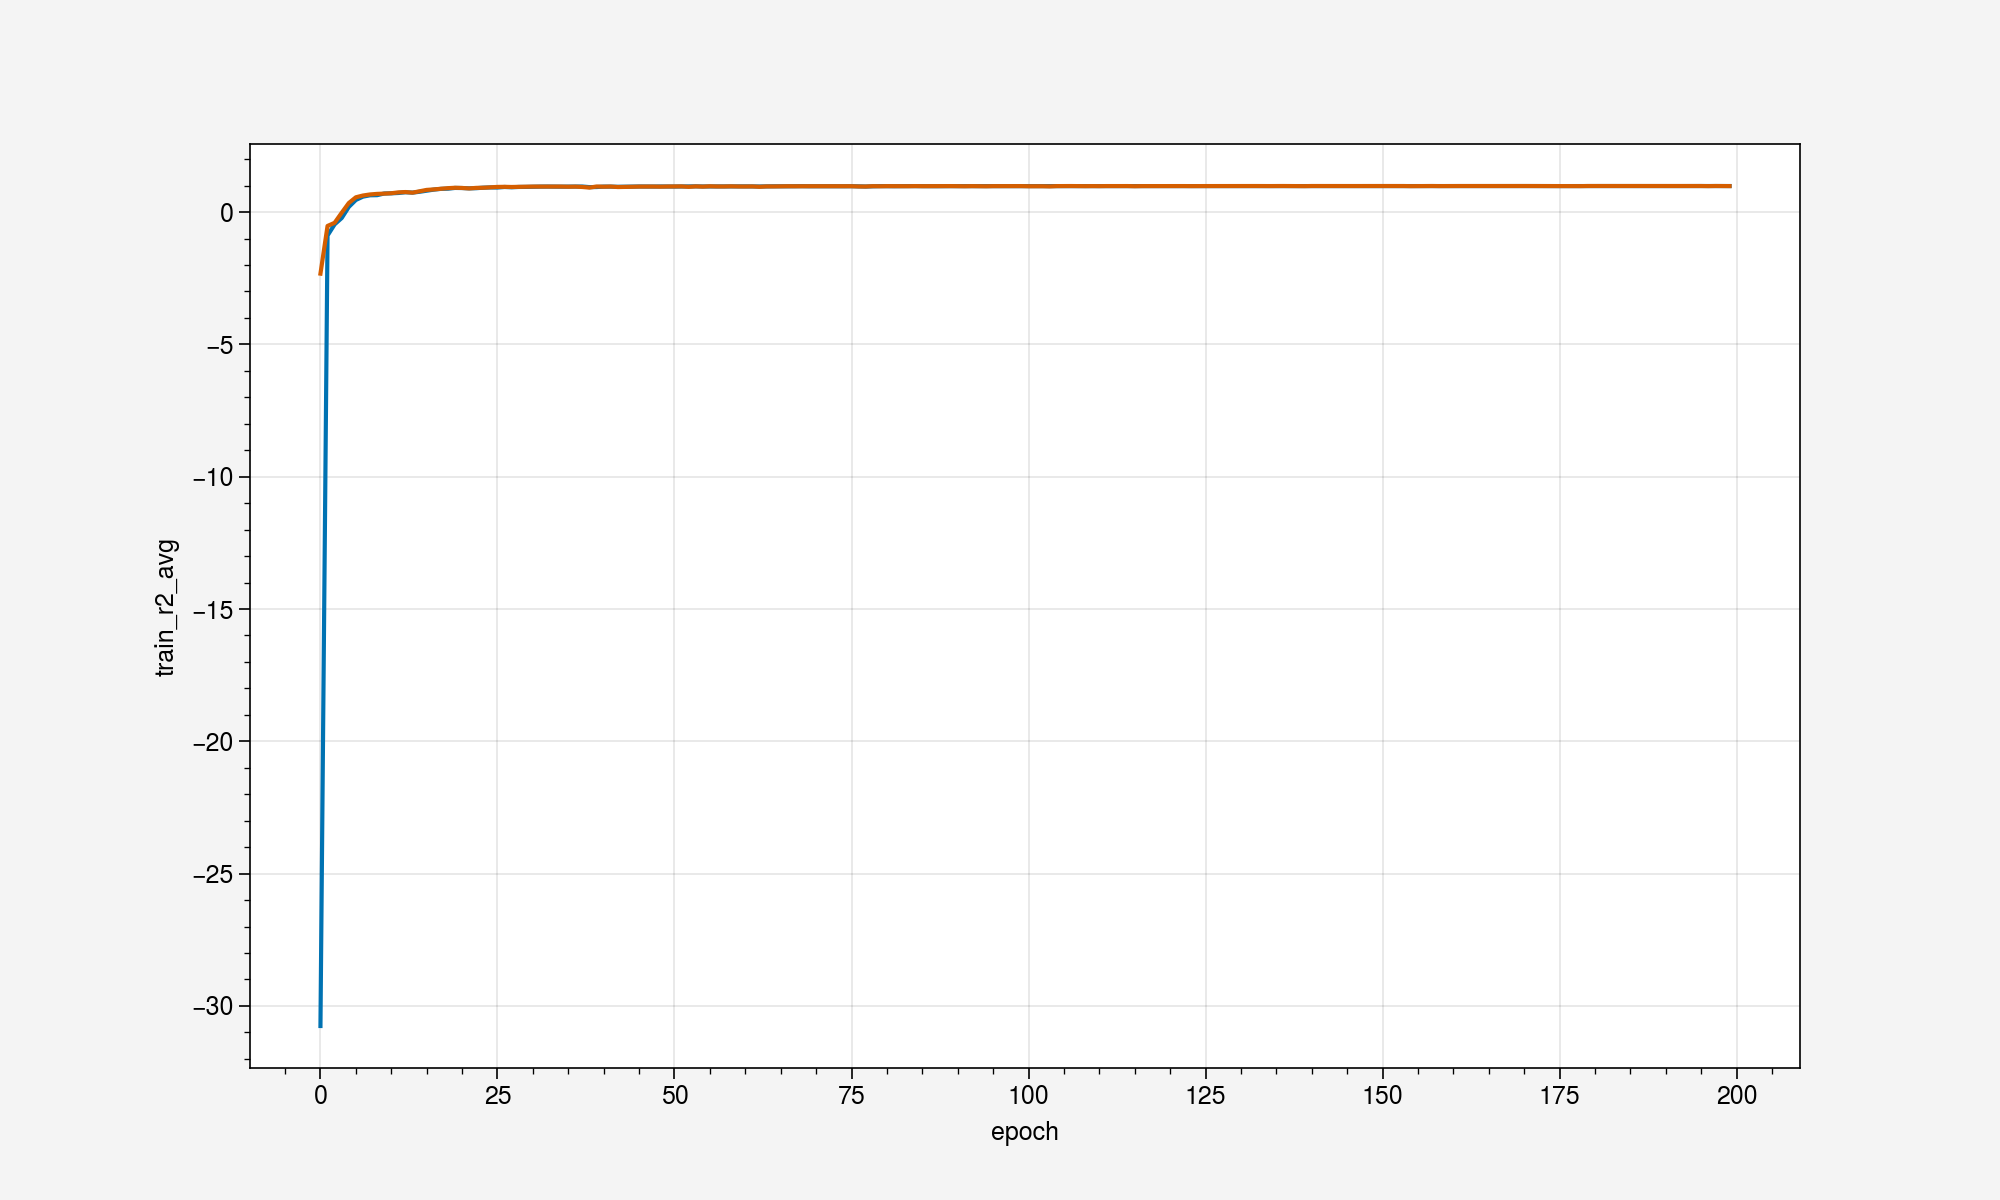

In [9]:
result_pd = pd.DataFrame()
result_pd['epoch'] = range(200)
result_pd['train_r2_avg'] = train_r2
result_pd['val_r2_avg'] = val_r2

plot_line_2(y_1='train_r2_avg', y_2='val_r2_avg', df=result_pd, fig_size=(10, 6), output_path=".\\imgs\\GasGiants_MDN20240116_TrainValR2_2.png", dpi=300)

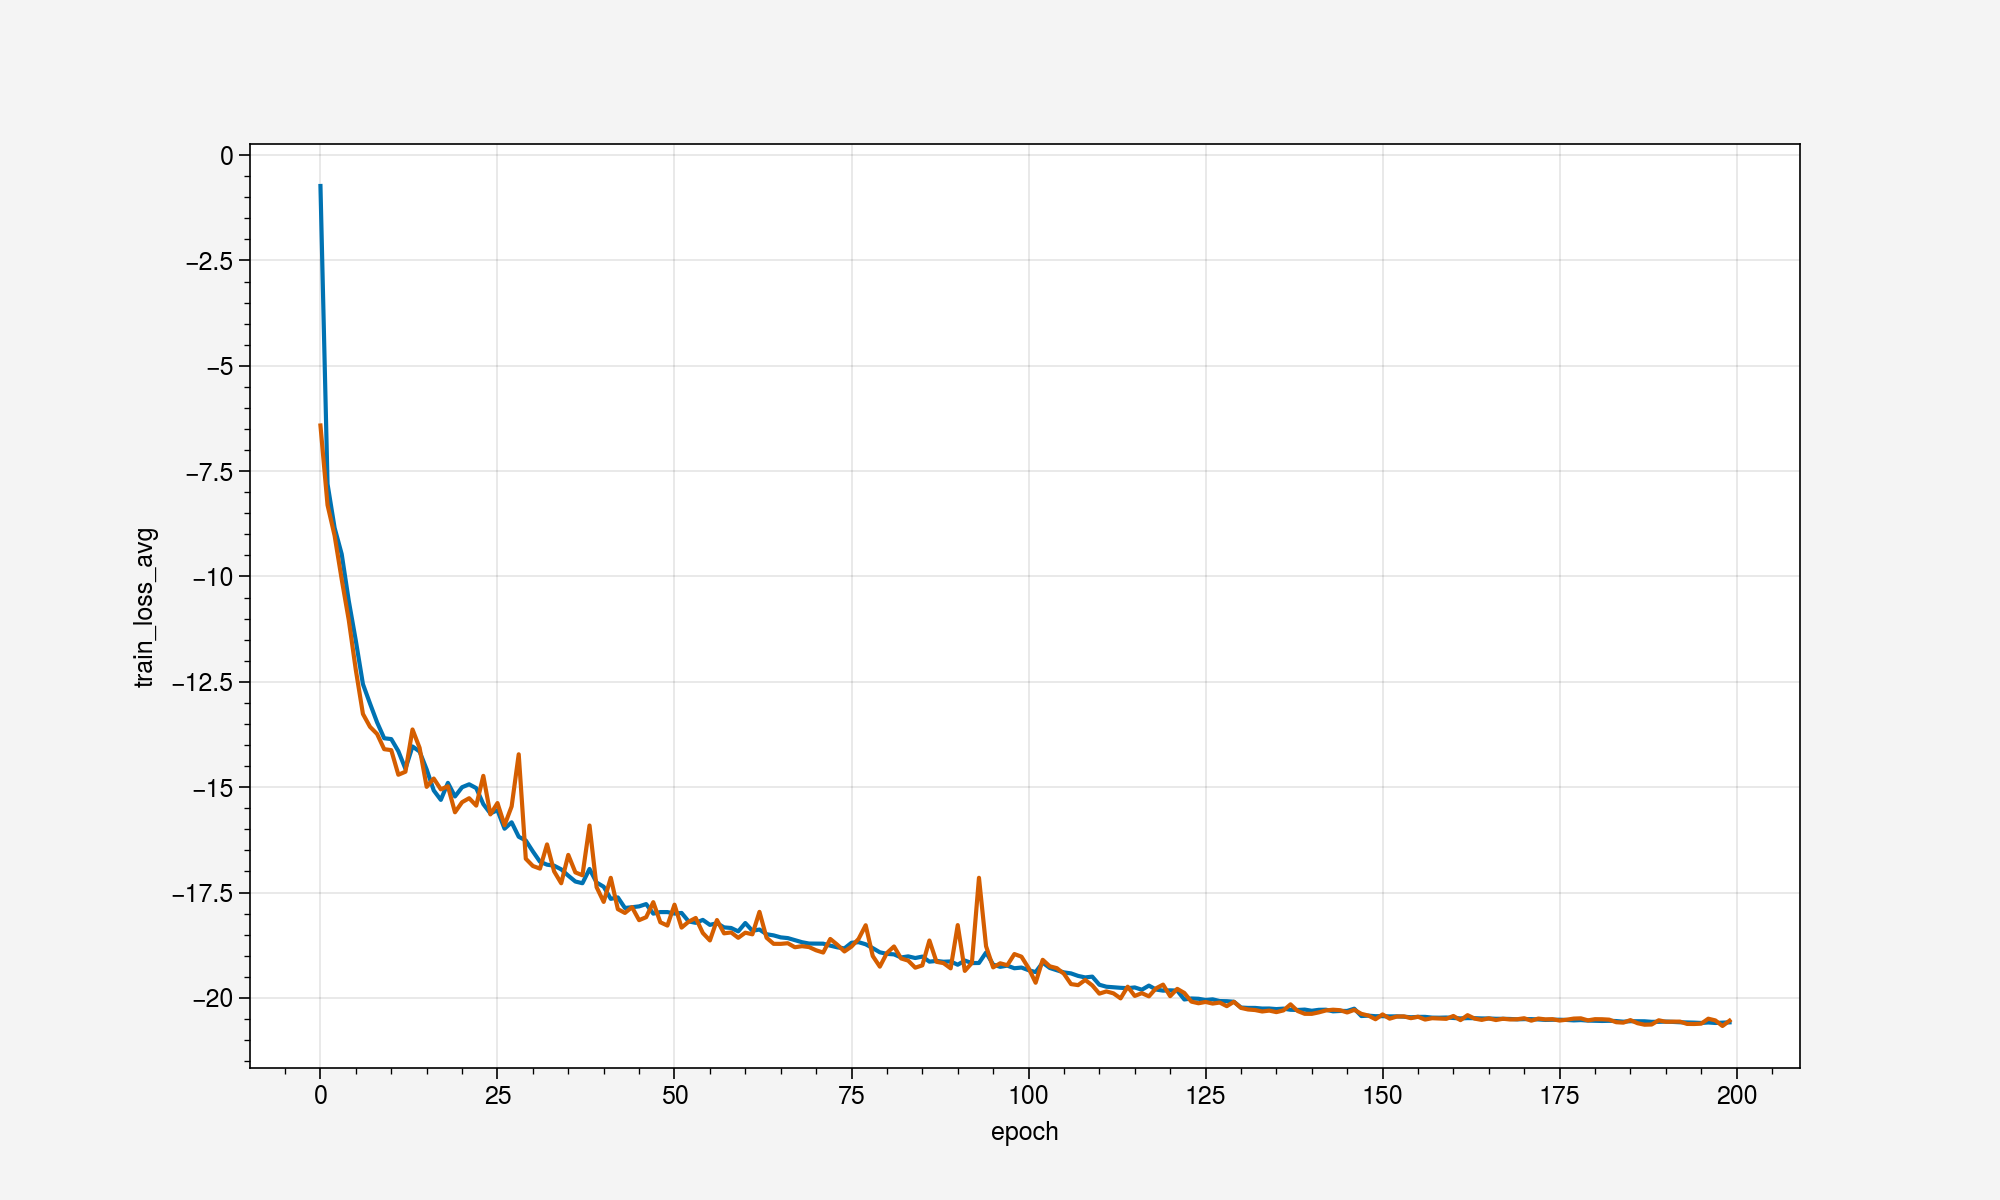

In [10]:
result_pd = pd.DataFrame()
result_pd['epoch'] = range(len(t_l))
result_pd['train_loss_avg'] = t_l
result_pd['validation_loss_avg'] = v_l

plot_line_2(y_1='train_loss_avg', y_2='validation_loss_avg', df=result_pd, output_path=".\\imgs\\GasGiants_MDN20240116_TrainValLoss_2.png")

In [11]:
# Check the Outlier
window = np.array([])
stride = 1
windows_size = int(len(t_l) / 10)

for i in range(0, len(v_l) - windows_size + stride, stride):
    curr_size = len(v_l) - i
    if curr_size < windows_size:
        tmp = np.array(v_l[i: i + curr_size])
    
    else:
        tmp = np.array(v_l[i: i + windows_size])

    mu = np.mean(tmp)
    sig = np.std(tmp)
    z_score = np.abs((tmp - mu) / sig)
    indices = np.where(z_score > 3.0)
    if np.any(indices):
        window = np.append(window, np.array([indices[j] + i for j in range(len(indices))]))

In [12]:
window = window.astype(np.int64)
count = {}
for i in range(len(window)):
    if window[i] not in count.keys():
        count[window[i]] = 1
    
    else:
        count[window[i]] += 1

outlier = [key for key, value in count.items() if value > 1]
print(outlier)

[38, 62, 93]


In [10]:
r2_distance = np.abs((np.array(train_r2) - np.array(val_r2)).mean())
loss_distance = np.abs((np.array(t_l) - np.array(v_l)).mean())
loss_dis_df = pd.DataFrame(np.abs(np.array(t_l) - np.array(v_l))).iloc[10:, :]
max_dis_10 = loss_dis_df.sort_values(by=0, ascending=False).iloc[:10, :].sort_index()

In [13]:
np.save('D:\\Resource\\MDN\\TestData\\GasGiantExo\\test_x.npy', t_x)
np.save('D:\\Resource\\MDN\\TestData\\GasGiantExo\\test_y.npy', t_y)
np.save('D:\\Resource\\MDN\\TestData\\GasGiantExo\\scaler_x.npy', m_x)
np.save('D:\\Resource\\MDN\\TestData\\GasGiantExo\\scaler_y.npy', m_y)
joblib.dump(m_x, "D:\\Resource\\MDN\\TestData\\GasGiantExo\\MDN_Xscaler_20231201.save")
joblib.dump(m_y, "D:\\Resource\\MDN\\TestData\\GasGiantExo\\MDN_yscaler_20231201.save")

['D:\\Resource\\MDN\\TestData\\GasGiantExo\\MDN_yscaler_20231201.save']

In [14]:
model.eval()
# Predict
pi, mu, sigma = model(t_x.to('cuda'))
mix = Mixture()
criterion = NLLLoss()
mse = nn.MSELoss()
sample = mix(pi, mu, sigma).sample()
t_y = t_y.to('cuda')
print("NLLLoss: {}, MSE: {}, R2: {}".format(criterion(pi, mu, sigma, t_y),
                                            mse(t_y, sample),
                                            r2_score(sample, t_y)))

NLLLoss: -20.536057256696047, MSE: 0.0005368457709640501, R2: 0.9852935789237973


In [15]:
pi_exp = torch.exp(pi)
mu_np = mu.detach().cpu().numpy()
sigma_np = sigma.detach().cpu().numpy()
pi_np = pi_exp.detach().cpu().numpy()

In [11]:
y_label = np.arange(0, 1, 0.001).reshape(-1, 1)
y_label_ = y_label[:, np.newaxis, np.newaxis, :]
idx_select = np.random.choice(range(0, len(mu_np)), 20000)
mu_sub = mu_np[idx_select]
sigma_sub = sigma_np[idx_select]
pi_sub = pi_np[idx_select]
mu_sub_T = np.transpose(mu_sub, (0, 2, 1))
sigma_sub_T = np.transpose(sigma_sub, (0, 2, 1))

# Example: shape(1000, 6, 100, 10) 1000 data, 6 type, 100 rows with 10 columns every type
exponent = np.exp(
    -1 / 2 * np.square(np.transpose((y_label_ - mu_sub_T), (1, 2, 0, 3)) / sigma_sub_T[:, :, np.newaxis, :]))
factors = 1 / math.sqrt(2 * math.pi) / sigma_sub_T[:, :, np.newaxis, :]
GMM_PDF = np.sum(pi_sub[:, np.newaxis, np.newaxis, :] * factors * exponent, axis=-1)
MM = MinMaxScaler()
GMM_PDF = GMM_PDF.reshape(GMM_PDF.shape[0] * GMM_PDF.shape[1], GMM_PDF.shape[-1]).transpose((-1, 0))
# f = e.transpose((-1, 0))
GMM_PDF_scaled = MM.fit_transform(GMM_PDF)
# t_y = t_y.detach().cpu().numpy()



In [16]:
test_y_inverse = m_y.inverse_transform(t_y.detach().cpu().numpy())

In [12]:
test_y_inverse_sub = test_y_inverse[idx_select]

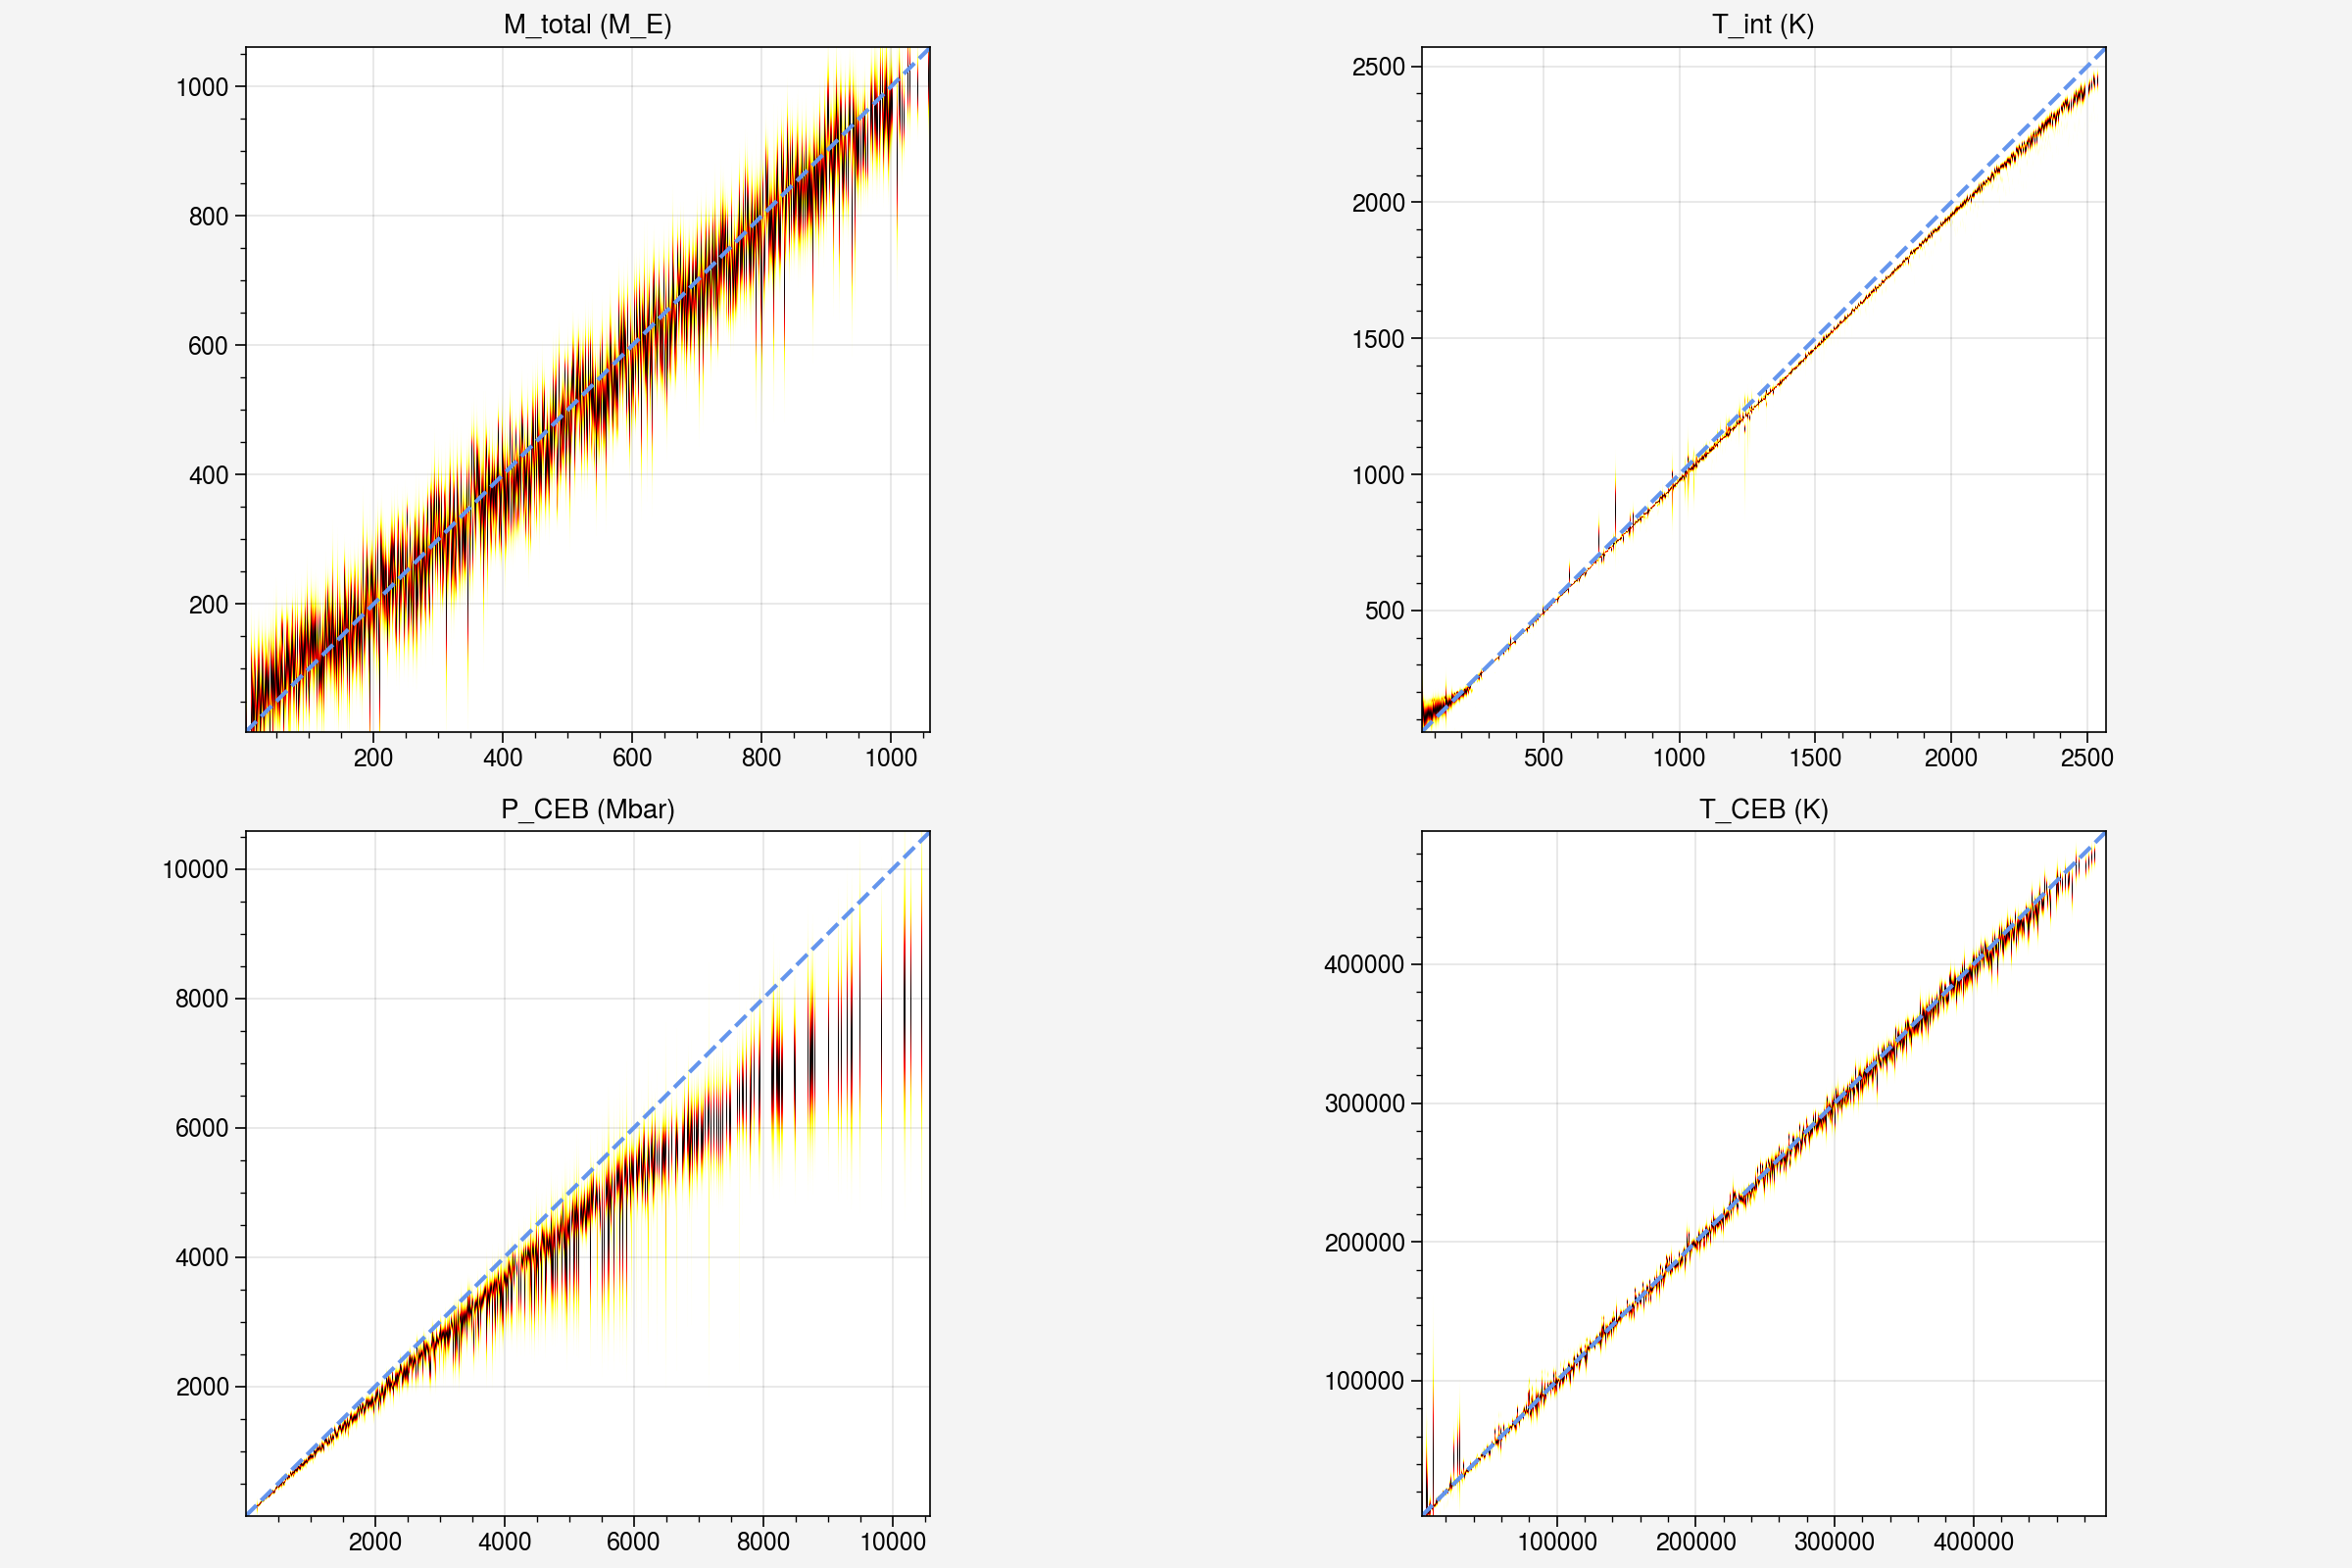

In [13]:
cmap = plt.cm.hot_r
norm = matplotlib.colors.Normalize(vmin=0, vmax=1)
fig, axs = pplt.subplots(
#     figsize=(4,4),
    nrows=2, ncols=2,
    share=False, 
    figsize=(12, 8)
#     tight=True,
)

input_parameters = [
    'Mass (M_J)',
    'Radius (R_E)',
    'T_sur (K)',
]

output_parameters = [
    'M_total (M_E)',
    'T_int (K)',
    'P_CEB (Mbar)',
    'T_CEB (K)'
]

xlocators = [
    200, 500, 2000, 100000
]
xminorlocators = [
    0.004, 0.02, 0.02, 0.02, 40, 100, 0.04, 0.004
]

OUTPUT_DIMS = len(output_parameters)

for o in range(OUTPUT_DIMS):
    y_max = max(test_y_inverse_sub[:, o])
    y_min = min(test_y_inverse_sub[:, o])
    for i in range(0, GMM_PDF_scaled.shape[-1], OUTPUT_DIMS):
        tx, ty = [test_y_inverse_sub[int(i / OUTPUT_DIMS), o], y_min]
        axs[o].imshow(
                GMM_PDF_scaled[:, o + i].reshape(-1, 1),
                cmap=cmap,
                norm=norm,
                origin='lower',
                extent=(tx, tx + 0.0001, ty, y_max)
            )

    axs[o].plot([y_min, y_max], [y_min, y_max], c='cornflowerblue', ls='--')
    axs[o].format(
        xlim=(y_min, y_max), ylim=(y_min, y_max), title=output_parameters[o], 
        # xlabel=output_parameters[o], 
        xlocator=xlocators[o]
        # ylocator=xlocators[o], yminorlocator=xminorlocators[o]
    )

In [14]:
fig.save('D:\\PythonProject\\RebuildProject\\Rock\\imgs\\prediction_GasGiantExoplanet_20240117.png')

In [19]:
def calculate_GMM(p, m, s):
    y_label = np.arange(0, 1, 0.01).reshape(-1, 1)
    y_label_ = y_label[:, np.newaxis, np.newaxis, :]

    mu_sub_T = np.transpose(m, (0, 2, 1))
    sigma_sub_T = np.transpose(s, (0, 2, 1))

    # shape(1000, 6, 100, 10) 1000 data, 6 type, 100 rows with 10 columns every type
    exponent = np.exp(
        -1 / 2 * np.square(np.transpose((y_label_ - mu_sub_T), (1, 2, 0, 3)) / sigma_sub_T[:, :, np.newaxis, :]))
    factors = 1 / math.sqrt(2 * math.pi) / sigma_sub_T[:, :, np.newaxis, :]
    GMM_PDF = np.sum(p[:, np.newaxis, np.newaxis, :] * factors * exponent, axis=-1)
    MM = MinMaxScaler()
    GMM_PDF = GMM_PDF.reshape(GMM_PDF.shape[0] * GMM_PDF.shape[1], GMM_PDF.shape[-1]).transpose((-1, 0))
    # f = e.transpose((-1, 0))
    return MM.fit_transform(GMM_PDF)

In [20]:
GMM_scaled = calculate_GMM(pi_np, mu_np, sigma_np)


In [25]:
col_dis = []
for o in range(len(output_parameters)):
    dis = 0
    for i in range(0, GMM_scaled.shape[-1], len(output_parameters)):
        test_y_current = test_y_inverse[int(i / len(output_parameters)), o]
        GMM_cal = GMM_scaled[:, o + i].reshape(-1, 1)
        offset = np.sqrt((GMM_cal - test_y_current) ** 2)
        dis += np.mean(offset)
    col_dis.append(dis / len(t_y))

In [26]:
col_dis

[334.2884762499741, 1080.7235426609527, 897.6645760123579, 181222.81976269314]

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
sns.set_style('white')

In [35]:
def plot_line_2(y_1: str, y_2: str, df: pd.DataFrame, output_path: str, fig_size: tuple = (10, 6), dpi: int = 300):
    """
    Plot Merge Line (2 Lines) using Seaborn
    :param y_1: Name of Line 1
    :param y_2: Name of Line 2
    :param df: Dataframe
    :param fig_size:
    :param output_path:
    :param dpi:
    :return: Show Line picture and save to the specific location
    """
    fig = plt.figure(figsize=fig_size)
    sns.lineplot(x='epoch', y=y_1, data=df)
    sns.lineplot(x='epoch', y=y_2, data=df)
    plt.show()
    fig.savefig(output_path, dpi=dpi)


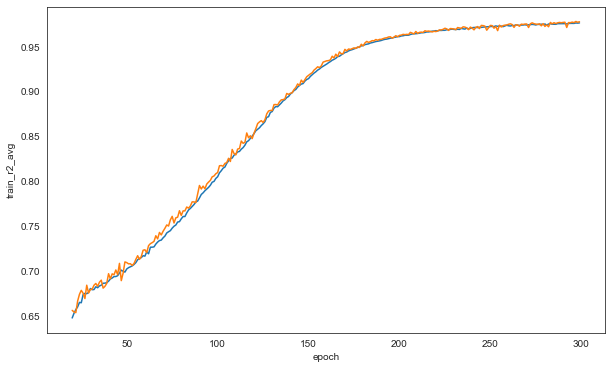

In [33]:
result_pd = pd.DataFrame()
result_pd['epoch'] = range(300)
result_pd['train_r2_avg'] = train_r2
result_pd['val_r2_avg'] = val_r2

plot_line_2(y_1='train_r2_avg', y_2='val_r2_avg', df=result_pd.iloc[20:, :], fig_size=(10, 6), output_path=".\\imgs\\GasGiants_MDN20231118_TrainValR2.png", dpi=300)

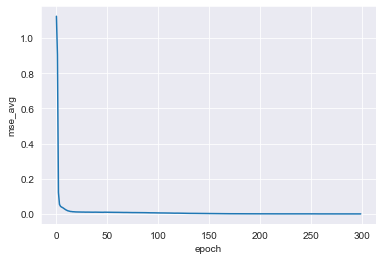

In [8]:
result_pd = pd.DataFrame()
result_pd['epoch'] = range(300)
result_pd['mse_avg'] = mse
sns.lineplot(x='epoch', y='mse_avg', data=result_pd)
plt.show()

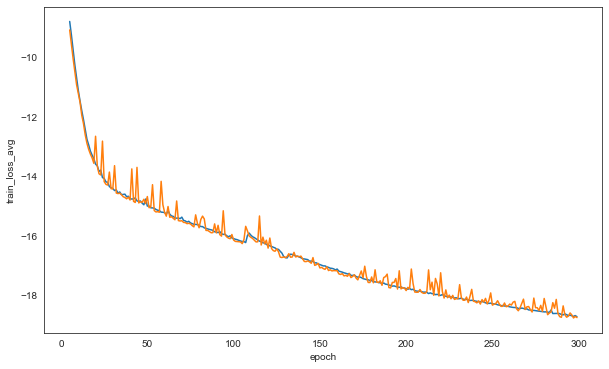

In [36]:
result_pd = pd.DataFrame()
result_pd['epoch'] = range(300)
result_pd['train_loss_avg'] = t_l
result_pd['validation_loss_avg'] = v_l

plot_line_2(y_1='train_loss_avg', y_2='validation_loss_avg', df=result_pd.iloc[5:, :], output_path=".\\imgs\\GasGiants_MDN20231118_TrainValLoss.png")

In [9]:
r2_distance = np.abs((np.array(train_r2) - np.array(val_r2)).mean())
loss_distance = np.abs((np.array(t_l) - np.array(v_l)).mean())
# loss_distance = np.abs(t_l[-1] - v_l[-1])

In [39]:
test_x_np = test_x.numpy()
test_y_np = test_y.numpy()

In [40]:
np.save('D:\\Resource\\MDN\\TestData\\test_x.npy', test_x_np)
np.save('D:\\Resource\\MDN\\TestData\\test_y.npy', test_y_np)
np.save('D:\\Resource\\MDN\\TestData\\scaler_x.npy', s_x)
np.save('D:\\Resource\\MDN\\TestData\\scaler_y.npy', s_y)